#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from PIL import Image

##### Load in csv data and format it to images and target data

In [2]:
import csv


data = []
with open("metadata.csv") as file:
    for row in csv.reader(file):
        data.append(row)

data = data[1:]

d = {'filename': [], 'target': []}

for image in data:
    # skip volume data
    if image[22] == "volumes":
        continue
    diagnosis = image[4].split("/")
    diagnosis = diagnosis[len(diagnosis) - 1].lower()
    # set target based on meta data
    if diagnosis != "covid-19":
        if diagnosis == "todo":
            # if not classified yet target = -1
            # d['filename'].append(image[23])
            # d['target'].append(-1)
            # ignore unknown data
            continue
        else:
            # if not COVID-19 target = 0
            d['filename'].append(image[23])
            d['target'].append(0)
    else:
        # if it is COVID-19
        if image[6] == "Y":
            # if they survived
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(1)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(2)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(3)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(4)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(5)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(6)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(7)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(8)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(9)
        elif image[6] == "N":
            # if they did not survive
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(10)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(11)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(12)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(13)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(14)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(15)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(16)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(17)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(18)
        else:
            # if their survival is unknown
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(19)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(20)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(21)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(22)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(23)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(23)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(24)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(25)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(26)

total = [0] * 28

for target in d['target']:
    if target == -1:
        total[27] += 1
    else:
        total[target] += 1

# set up binary classification (covid vs non-covid)
# all targets > 0 are covid
for i in range(len(d['target'])):
    if d['target'][i] > 0:
        d['target'][i] = 1

print(total)
#print(d)

file.close()


[283, 4, 3, 0, 0, 65, 0, 3, 6, 81, 8, 8, 2, 0, 1, 1, 0, 0, 18, 45, 35, 8, 0, 9, 0, 5, 261, 0]


In [3]:
print(len(d['target']))

846


#### Preprocessing for images

In [17]:
# Load in image data from filenames with PIL
img_dim = 768
images = np.empty((len(d['target']), img_dim, img_dim, 3))

for i in range(len(d['filename'])):
    image = Image.open("images/" + d['filename'][i])
    
    # resize image shape
    image = image.resize((img_dim, img_dim))
    
    # convert to RGB
    image = image.convert('RGB')
    
    images[i] = np.array(image)

In [18]:
# normalize values
images = images / 255.0

(846, 768, 768, 3)


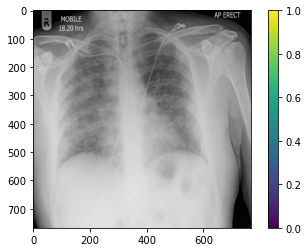

In [19]:
plt.imshow(images[700])
plt.colorbar()
print(images.shape)

(846, 768, 768, 3)


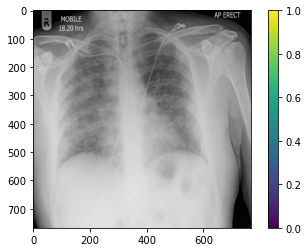

In [20]:
plt.imshow(images[700])
plt.colorbar()
print(images.shape)

#### Split each image into 6 128 x 128 images to train deep learning model. Create new target values that match smaller images

In [8]:
# split into training and testing da

# create new image array and match target values for each broken image

def picSplit(red_dim, img_dim, init_images, init_targets):
    split_size = int(img_dim / red_dim)

    red_images = np.empty((len(init_targets) * split_size * split_size, red_dim, red_dim))
    targets = np.empty((len(init_targets) * split_size * split_size))


    red_ind = 0
    for r in range(len(init_images)):
        for i in range(split_size):
            for j in range(split_size):
                start_x = i * (red_dim - 1)
                start_y = j * (red_dim - 1)
                end_x = start_x + red_dim
                end_y = start_y + red_dim
                red_image = init_images[r][start_x:end_x, start_y:end_y]

                red_images[red_ind] = np.array(red_image)
                targets[red_ind] = init_targets[r]
                red_ind += 1
    return (red_images, targets)

        

NameError: name 'red_images' is not defined

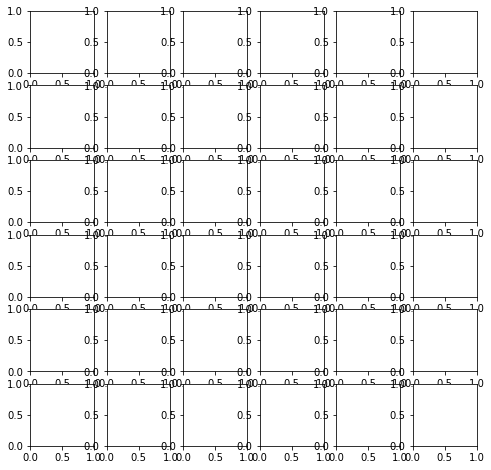

In [10]:
fig, axs = plt.subplots(6, 6, figsize=(8, 8))

ind = 72
for i in range(6):
    for j in range(6):
        axs[i][j].imshow(red_images[ind])
        ind += 1

#### Create and train model

In [41]:
# split data
init_x_train, init_x_test, init_y_train, init_y_test = train_test_split(images, d['target'], test_size=0.25, random_state=0)
init_y_train = np.asarray(init_y_train)
init_y_test = np.asarray(init_y_test)

# split the images
red_dim  = 768
#train_data = picSplit(red_dim, img_dim, init_x_train, init_y_train)
#test_data = picSplit(red_dim, img_dim, init_x_test, init_y_test)

#x_train = train_data[0]
#y_train = train_data[1]

#x_test = test_data[0]
#y_test = test_data[1]



In [45]:
# build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(red_dim, red_dim)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [46]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
# train model on training data
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
80/80 [==============================] - 24s 295ms/step - loss: 7963.8076 - accuracy: 0.5714
Epoch 2/5
80/80 [==============================] - 22s 276ms/step - loss: 3884.6814 - accuracy: 0.6092
Epoch 3/5
80/80 [==============================] - 22s 281ms/step - loss: 2798.4536 - accuracy: 0.6009
Epoch 4/5
80/80 [==============================] - 23s 285ms/step - loss: 2674.1575 - accuracy: 0.5875
Epoch 5/5
80/80 [==============================] - 23s 289ms/step - loss: 2132.6899 - accuracy: 0.5974


In [48]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

27/27 - 1s - loss: 4261.0435 - accuracy: 0.3927

Test accuracy: 0.39268869161605835


In [44]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

27/27 - 0s - loss: 611.7069 - accuracy: 0.6274

Test accuracy: 0.6273584961891174


In [42]:
# build model for convolusion network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(red_dim, red_dim, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add more layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [43]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 766, 766, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 383, 383, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 381, 381, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 190, 190, 64)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 188, 188, 64)      36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 2262016)           0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [44]:
# compile 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# train
history = model.fit(init_x_train, init_y_train, epochs=10, 
                    validation_data=(init_x_test, init_y_test))

Epoch 1/10
20/20 [==============================] - 217s 11s/step - loss: 7.4190 - accuracy: 0.6325 - val_loss: 1.6192 - val_accuracy: 0.6321
Epoch 2/10
20/20 [==============================] - 208s 10s/step - loss: 0.7388 - accuracy: 0.7019 - val_loss: 0.6372 - val_accuracy: 0.6698
Epoch 3/10
20/20 [==============================] - 190s 9s/step - loss: 0.6155 - accuracy: 0.7634 - val_loss: 0.6250 - val_accuracy: 0.6509
Epoch 4/10
20/20 [==============================] - 173s 9s/step - loss: 0.4334 - accuracy: 0.8360 - val_loss: 0.8198 - val_accuracy: 0.6321
Epoch 5/10
20/20 [==============================] - 171s 9s/step - loss: 0.2872 - accuracy: 0.9085 - val_loss: 1.4074 - val_accuracy: 0.6368
Epoch 6/10
20/20 [==============================] - 3204s 160s/step - loss: 0.1671 - accuracy: 0.9385 - val_loss: 1.6798 - val_accuracy: 0.6038
Epoch 7/10
20/20 [==============================] - 527s 26s/step - loss: 0.1524 - accuracy: 0.9590 - val_loss: 1.4614 - val_accuracy: 0.6038
Epoch 8

7/7 - 8s - loss: 2.9153 - accuracy: 0.6415


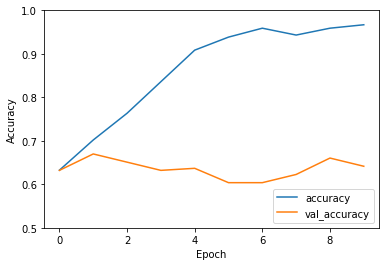

In [46]:
# evaluate
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(init_x_test,  init_y_test, verbose=2)